# Imports and install Libs

In [1]:
import general.utils as utils
utils.reload()
import general.libinstall
from constants import methods
import pandas as pd
import numpy as np

100%|██████████| 16/16 [00:00<00:00, 28.27it/s]
2022-08-15 08:38:24.073803: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


=================== The required libraries have been  installed ===================


# Loading Dataset

In [2]:
datasetdscr = methods.dataset[0]['method']().load()
print(f'dataset={datasetdscr.data_dscr}')
datasetdscr.activities_map

['Personal_Hygiene' 'Leave_Home' 'Enter_Home' 'Meal_Preparation'
 'Sleeping_Not_in_Bed' 'Take_Medicine' 'Eating' 'Housekeeping'
 'Sleeping_in_Bed' 'Bathing' 'Bed_Toilet_Transition']
dataset=Home1


{0: 'None',
 1: 'Bathing',
 2: 'Bed_Toilet_Transition',
 3: 'Eating',
 4: 'Enter_Home',
 5: 'Housekeeping',
 6: 'Leave_Home',
 7: 'Meal_Preparation',
 8: 'Personal_Hygiene',
 9: 'Sleeping_Not_in_Bed',
 10: 'Sleeping_in_Bed',
 11: 'Take_Medicine'}

# Visualize DataSet

100%|██████████| 16/16 [00:00<00:00, 796.50it/s]

=================== The required libraries have been  installed ===================
sensor events:


SID                       time  value
20  M003 2010-11-04 03:42:21.823650    1.0
21  T002 2010-11-04 03:42:25.128495   20.0
22  M003 2010-11-04 03:42:25.939730    0.0
23  M003 2010-11-04 03:49:52.412755    1.0
24  M003 2010-11-04 03:49:57.473649    0.0

activity_events:


StartTime                    EndTime  Activity  \
1 2010-11-04 05:40:51.303739 2010-11-04 05:43:30.279021         1   

                Duration  
1 0 days 00:02:38.975282

sensor_desc:


ItemName  Cumulative  Nominal  OnChange                     ItemRange  \
ItemId                                                                         
D002       D002           0        1         1  {'range': ['CLOSE', 'OPEN']}   
D004       D004           0        1         1  {'range': ['CLOSE', 'OPEN']}   

       Location Object SensorName  
ItemId                             
D002       None   None       None  
D004       None   None       None

Activites:  ['None' 'Bed_to_Toilet' 'Eating' 'Enter_Home' 'Housekeeping' 'Leave_Home'
 'Meal_Preparation' 'Relax' 'Respirate' 'Sleeping' 'Wash_Dishes' 'Work']
0 None 	--> count= 0  avg duration= NaT
1 Bed_to_Toilet 	--> count= 156  avg duration= 0 days 00:02:43.768858160
2 Eating 	--> count= 255  avg duration= 0 days 00:10:08.956068960
3 Enter_Home 	--> count= 427  avg duration= 0 days 00:00:06.756965461
4 Housekeeping 	--> count= 33  avg duration= 0 days 00:20:19.441076818
5 Leave_Home 	--> count= 427  avg duration= 0 days 00:00:06.366905384
6 Meal_Preparation 	--> count= 1596  avg duration= 0 days 00:07:50.569201409
7 Relax 	--> count= 2907  avg duration= 0 days 00:33:26.497770572
8 Respirate 	--> count= 6  avg duration= 0 days 00:08:33.858463500
9 Sleeping 	--> count= 398  avg duration= 0 days 04:01:21.525095457
10 Wash_Dishes 	--> count= 64  avg duration= 0 days 00:07:14.767501593
11 Work 	--> count= 171  avg duration= 0 days 00:17:04.827750087


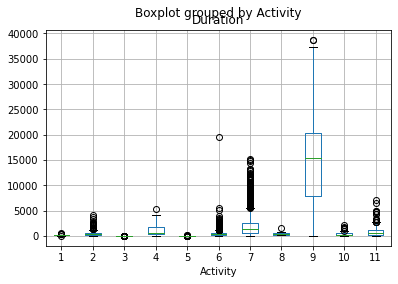

In [4]:
import result_analyse
import general.utils as utils
import importlib
importlib.reload(result_analyse.dataset_viewer)
utils.reload()
result_analyse.dataset_viewer.displaycontent(datasetdscr)


In [3]:
import importlib
importlib.reload(result_analyse.dataset_viewer)

# for act in datasetdscr.activities_map:
# 	result_analyse.dataset_viewer.view(datasetdscr,act)
result_analyse.dataset_viewer.sensor_hitmap(datasetdscr)
	

NameError: name 'result_analyse' is not defined

In [ ]:
import importlib
importlib.reload(result_analyse.dataset_viewer)

# for act in datasetdscr.activities_map:
result_analyse.dataset_viewer.plotAct(datasetdscr,datasetdscr.activity_events)

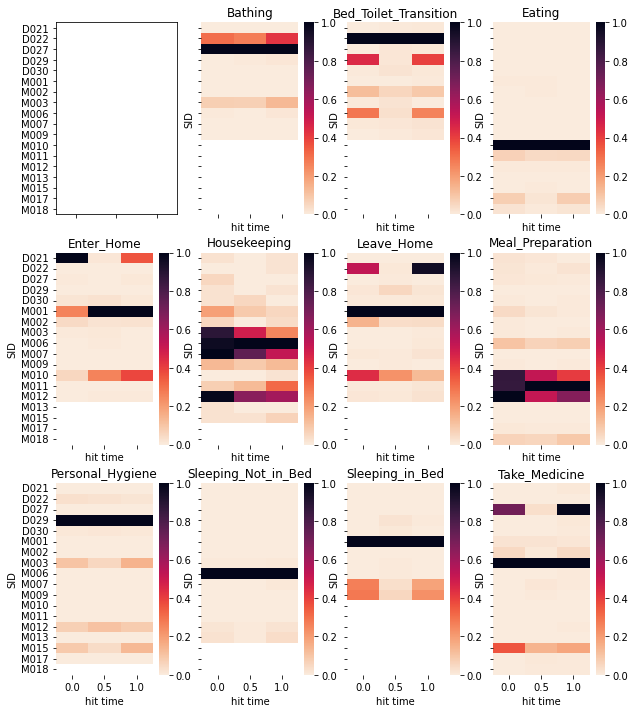

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [6]:
import importlib
importlib.reload(result_analyse.dataset_viewer)
result_analyse.dataset_viewer.sensor_hitmap(datasetdscr)

# Train Test Builder

In [3]:
import evaluation
evalmethod=evaluation.SplitEval.SplitEval()
evalmethod.dataset=datasetdscr
Train,Test=evalmethod.makeTrainTest(datasetdscr.sensor_events,datasetdscr.activity_events)
Train.acts=list(datasetdscr.activities_map.keys())
Test.acts=list(datasetdscr.activities_map.keys())
Train.act_map=datasetdscr.activities_map
Test.act_map=datasetdscr.activities_map

# PreProcessing

In [4]:
utils.reload()
preprocessing=methods.preprocessing[0]['method']()
TrainData=preprocessing.process(datasetdscr,Train)
TestData=preprocessing.process(datasetdscr,Test)

100%|██████████| 16/16 [00:00<00:00, 469.61it/s]


=================== The required libraries have been  installed ===================


# Segmentation

In [5]:
from segmentation.segmentation_abstract import prepare_segment,prepare_segment2
utils.reload()
func=utils.Data('func')
func.acts=TrainData.acts

segindx=0

func.segmentor=methods.segmentation[segindx]['method']()
func.segmentor.applyDefParams(methods.segmentation[segindx]['params'])


func.activityFetcher=methods.activity_fetcher[0]['method']()

Strain=prepare_segment2(func,TrainData,datasetdscr,train=True)
Stest=prepare_segment2(func,TestData,datasetdscr,train=False)

print('Segmentation Finished %d Train segment %d Test segment created %s' % (len(Strain.set_window),len(Stest.set_window), func.segmentor.shortname()))

100%|██████████| 16/16 [00:00<00:00, 587.05it/s]


=================== The required libraries have been  installed ===================


FixedEventWindow: |          count=0 time=00:00 speed=?it/s

FixedEventWindow: |          count=0 time=00:00 speed=?it/s

Segmentation Finished 322006 Train segment 49917 Test segment created FixedEventWindow


# Feature Extraction

In [6]:
utils.reload()
from feature_extraction.feature_abstract import featureExtraction
feat=methods.feature_extraction[0]
featureExtractor=feat['method']()

# feat['params'][0]['k']=2
featureExtractor.applyDefParams(feat['params'])
Strain.set=featureExtraction(featureExtractor,datasetdscr,Strain,istrain=True)
Stest.set =featureExtraction(featureExtractor,datasetdscr,Stest,istrain=False)
print('FeatureExtraction Finished train shape %s , test shape %s , %s' % (str(Strain.set.shape),str(Stest.set.shape), featureExtractor.shortname()))


100%|██████████| 16/16 [00:00<00:00, 444.77it/s]


=================== The required libraries have been  installed ===================
precompute finished dictsize=64
FeatureExtraction Finished train shape (322006, 26) , test shape (49917, 26) , SensorWord


In [93]:
Strain.set[0].astype(int)
# featureExtractor.tokenizer.word_index


array([542,  19,   1, 978,   2,   4, 977,   3,   5,   1,   2,   4, 328,
        78,  44,  35,   3,   5,   1,   2,   0,   0,   0,   0,   0,   0])

# Feature Importance

In [59]:
def plotFeatureImportance(dataset):
	from sklearn.ensemble import ExtraTreesClassifier
	import matplotlib.pyplot as plt
	X=pd.DataFrame(dataset.set)
	y=dataset.label
	model = ExtraTreesClassifier()
	model.fit(X,y)
	# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
	#plot graph of feature importances for better visualization
	feat_importances = pd.Series(model.feature_importances_, index=X.columns)
	feat_importances.nlargest(20).plot(kind='barh')
	plt.show()

print('important feature in train set')
plotFeatureImportance(Strain)
print('without cheating it should be similar in test set')
plotFeatureImportance(Stest)

important feature in train set


KeyboardInterrupt: 

# Features Correlation 

data correlation in train set
without cheating, it should be similar, data correlation in test set


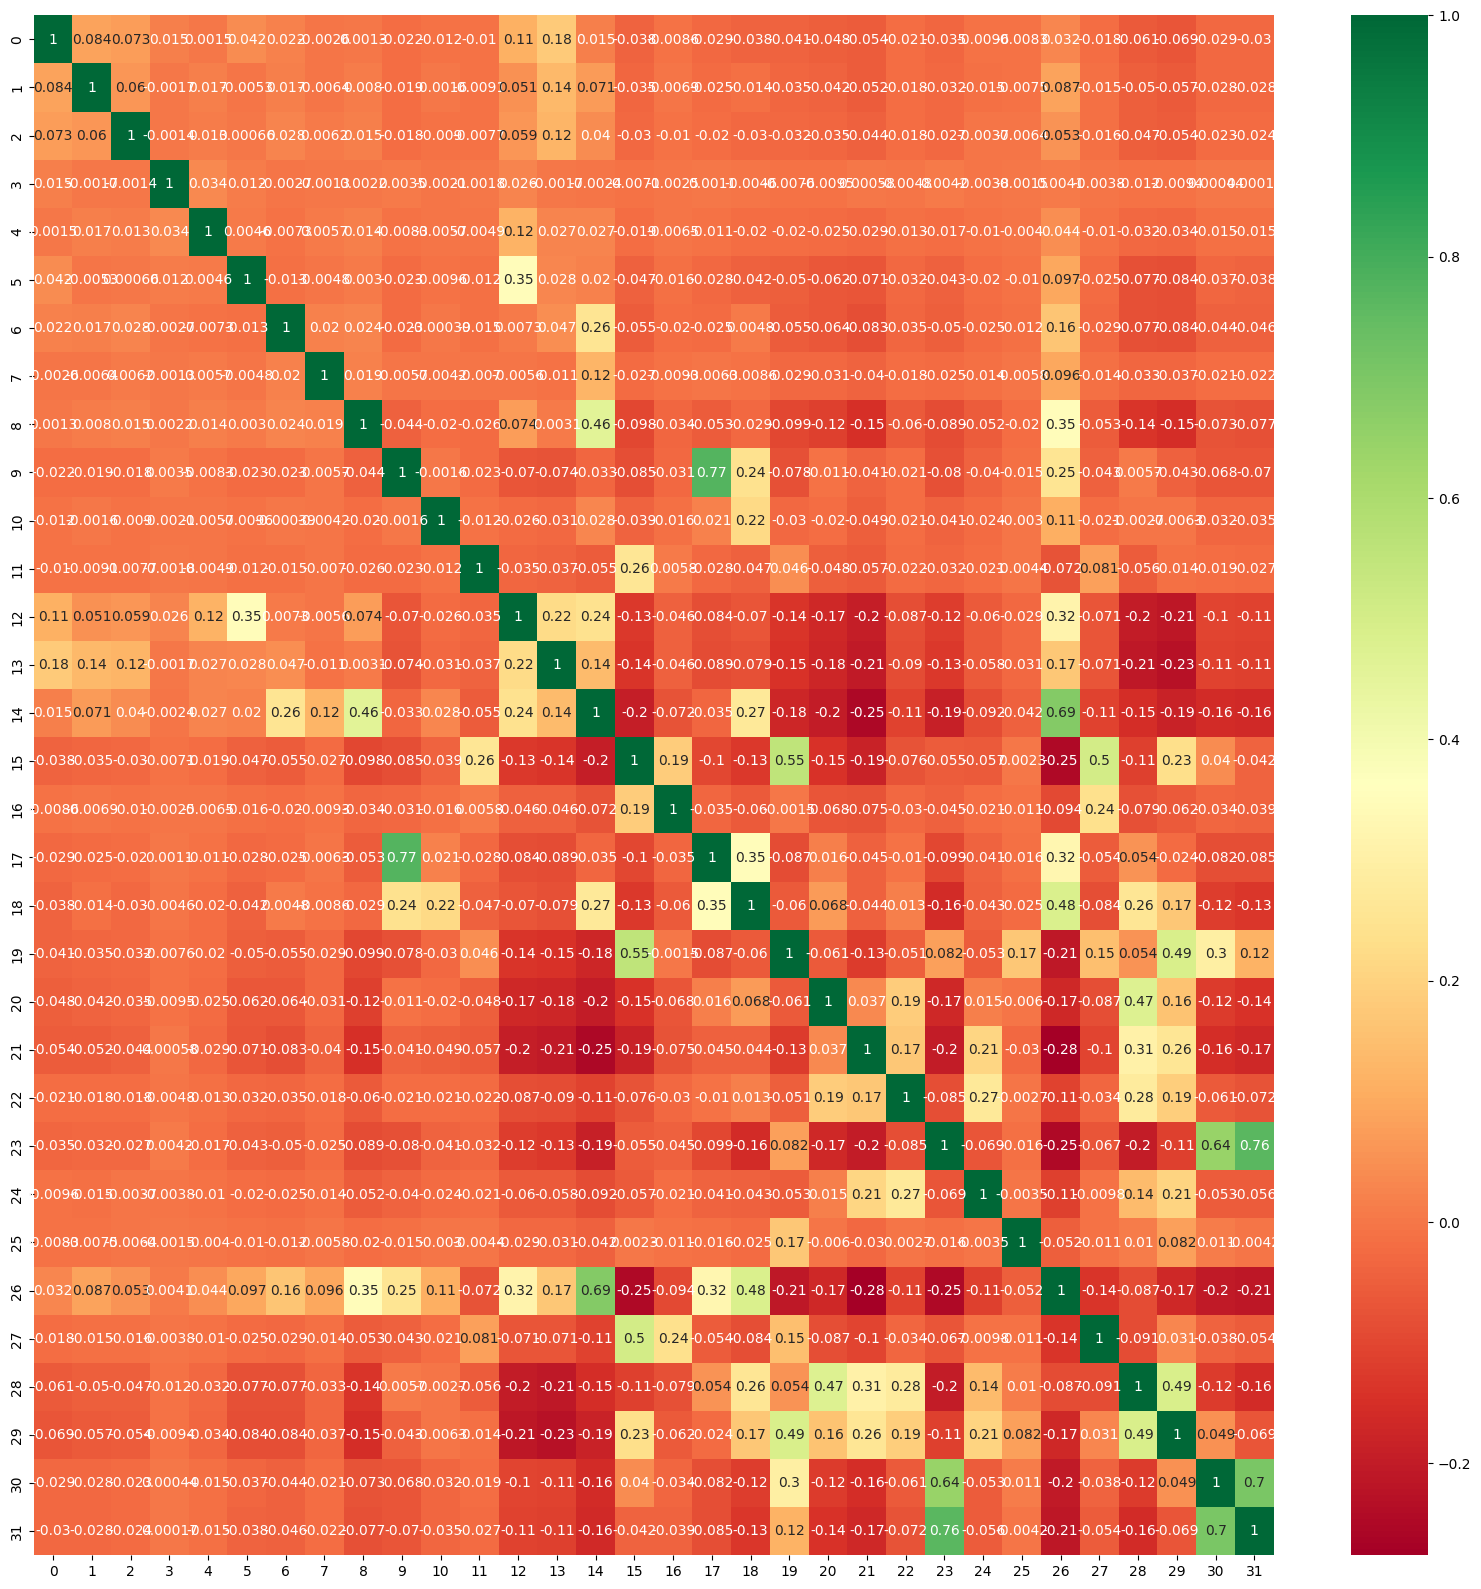

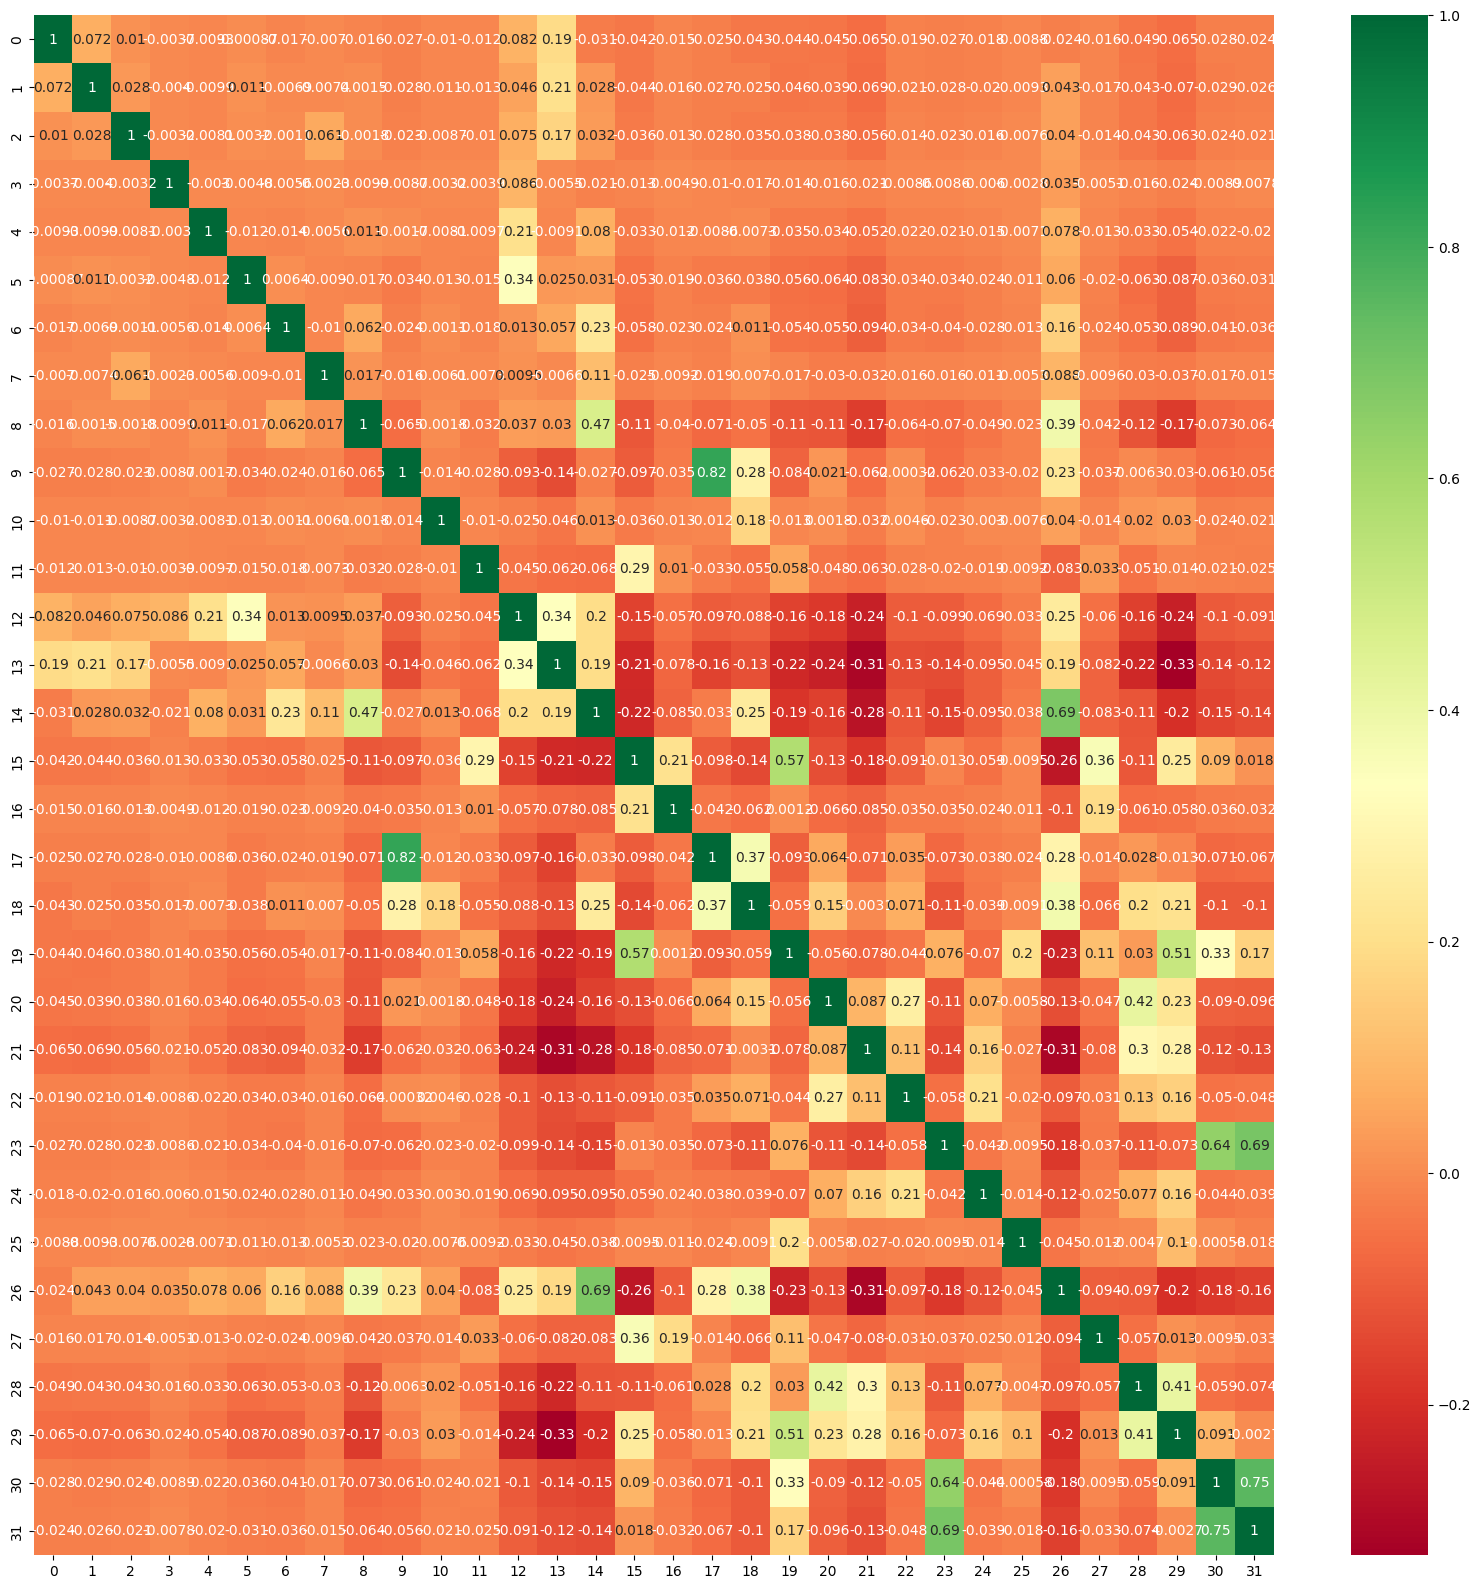

In [ ]:
def dataCorr(dataset):
	import seaborn as sns
	data=pd.DataFrame(dataset.set)
	corrmat = data.corr()
	top_corr_features = corrmat.index
	plt.figure(figsize=(20,20))
	#plot heat map
	g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

print('data correlation in train set')
dataCorr(Strain)
print('without cheating, it should be similar, data correlation in test set')
dataCorr(Stest)

# Classifier

In [7]:
utils.reload()
# cmethod='LSTMAE'
cmethod=0
# print(list(enumerate(methods.classifier)))
# cmethod='sk'
if cmethod=='sk':
	from classifier.MySKLearn import CustomSklearn
	from sklearn.ensemble import RandomForestClassifier
	# from sklearn.utils.class_weight import compute_class_weight
	# classes = np.unique(Strain.label)
	# cw = compute_class_weight("balanced", classes=classes, y=Strain.label)
	classifier=CustomSklearn(RandomForestClassifier(class_weight='balanced_subsample'))
elif cmethod=='LSTMAE':
	from classifier.Keras import SequenceNN
	class LSTMAR(SequenceNN):
		def getmodel(self, inputsize, outputsize):
			import tensorflow as tf
			print(inputsize)
			feats=inputsize[1]
			return tf.keras.models.Sequential([
				tf.keras.layers.LSTM(feats, return_sequences=True, activation=tf.nn .relu,input_shape=inputsize),
				tf.keras.layers.LSTM(feats//2, return_sequences=True, activation=tf.nn .relu),
				tf.keras.layers.LSTM(feats, activation=tf.nn .relu),
				#tf.keras.layers.Dense(512, activation=tf.nn.relu),
				tf.keras.layers.Dropout(0.2),
				tf.keras.layers.Dense(outputsize, activation=tf.nn.softmax)
			], name=self.shortname())
	classifier=LSTMAR()
	classifier.applyParams({'epochs':10})
	
else:
	classifier=methods.classifier[cmethod]['method']()
	classifier.applyDefParams(methods.classifier[cmethod]['params'])


classifier.createmodel(Strain.set[0].shape,len(Strain.acts),update_model=0)
classifier.setWeight(None)
print('Classifier model created  %s' % (classifier.shortname()))

classifier.train(Strain.set, Strain.label) 
print('Classifier model trained  %s' % (classifier.shortname()))

100%|██████████| 16/16 [00:00<00:00, 408.09it/s]
2022-08-15 08:41:42.005111: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-15 08:41:42.007489: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-15 08:41:42.034353: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-08-15 08:41:42.034472: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-08-15 08:41:42.040441: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-08-15 08:41:42.040543: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Succes

=================== The required libraries have been  installed ===================
inputsize (26, 1)
Model: "FCN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 26, 1)]           0         
_________________________________________________________________
masking (Masking)            (None, 26, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 128)           1152      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 128)           512       
_________________________________________________________________
activation (Activation)      (None, 26, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 26, 256)           164096    
___________________________

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Classifier model created  FCN


2022-08-15 08:41:44.369852: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-15 08:41:44.392947: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2195005000 Hz
2022-08-15 08:41:45.909706: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-08-15 08:41:46.556586: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-08-15 08:41:46.565121: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


Epoch 00057: early stopping
Classifier model trained  FCN


# display classic metrics

train {'accuracy': 0.69, 'precision': array([0.72561589, 0.73554884, 0.42485047, 0.52152522, 0.80560662,
       0.47058824, 0.76447462, 0.88409298, 0.63260031, 0.84351758,
       0.54665449, 0.4056314 ]), 'recall': array([0.74602947, 0.94440134, 0.90468365, 0.97254677, 0.90407427,
       0.64      , 0.90905227, 0.27099789, 0.93328678, 0.75905997,
       0.95921773, 0.86720175]), 'f1': array([0.7356811 , 0.82699275, 0.57818039, 0.67896014, 0.85200486,
       0.54237288, 0.83051835, 0.41483721, 0.75407417, 0.79906327,
       0.69642122, 0.55272643])}
train macro avg {'accuracy': 0.69, 'precision': 0.64, 'recall': 0.82, 'f1': 0.68}
test {'accuracy': 0.55, 'precision': array([0.58979744, 0.73762376, 0.28862479, 0.32689494, 0.42071882,
       0.        , 0.38861386, 0.76265615, 0.58773424, 0.30593958,
       0.57179097, 0.16229839]), 'recall': array([0.65465465, 0.72067715, 0.51051051, 0.4881993 , 0.4595843 ,
       0.        , 0.29074074, 0.27230047, 0.88974855, 0.63428875,
       0.898724

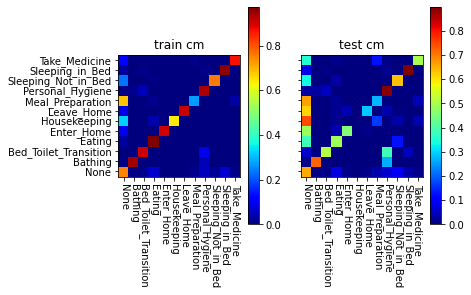

In [8]:
import result_analyse.visualisation
import importlib
importlib.reload(result_analyse.visualisation)
from matplotlib.pylab import plt
import result_analyse.visualisation as vs
from metric.CMbasedMetric import CMbasedMetric
from sklearn.metrics  import confusion_matrix
train_predicted        =classifier.predict(Strain.set)
train_predicted_classes=classifier.predict_classes(Strain.set)    

train_cm=confusion_matrix(Strain.label,train_predicted_classes)
fig,axs=plt.subplots(1,2,sharex=True,sharey=True)
vs.plot_CM_normal(train_cm,datasetdscr.activities,title='train cm',ax=axs[0])
print('train',CMbasedMetric(train_cm));
print('train macro avg',CMbasedMetric(train_cm,'macro'));

test_predicted        =classifier.predict(Stest.set)
test_predicted_classes=classifier.predict_classes(Stest.set)

test_cm=confusion_matrix(Stest.label,test_predicted_classes)
vs.plot_CM_normal(test_cm,datasetdscr.activities,title='test cm',ax=axs[1])
print('test',CMbasedMetric(test_cm));
print('test macro avg',CMbasedMetric(test_cm,'macro'));

        

# Display event metrics

train events merged  EmptyCombiner2
test events merged  EmptyCombiner2
visualizing real and pred1
visualizing real and pred1


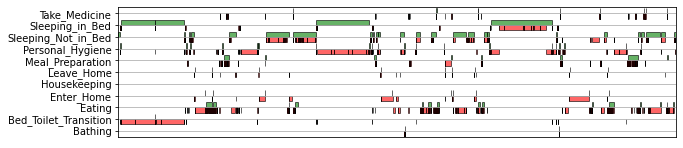

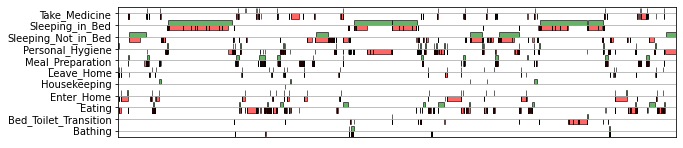

In [9]:
import importlib
import combiner.SimpleCombiner
importlib.reload(combiner.SimpleCombiner)
combiner=methods.combiner[0]['method']()
train_pred_events      =combiner.combine(Strain.s_event_list,Strain.set_window,train_predicted)
print('train events merged  %s' % (combiner.shortname()))
test_pred_events      =combiner.combine(Stest.s_event_list,Stest.set_window,test_predicted)
print('test events merged  %s' % (combiner.shortname()))
import result_analyse.visualisation as vs
import importlib
importlib.reload(result_analyse.visualisation)

vs.plot_joint_events(datasetdscr, Train.a_events, train_pred_events)
vs.plot_joint_events(datasetdscr, Test.a_events, test_pred_events)

In [27]:
train_pred_events.loc[train_pred_events['StartTime']>train_pred_events['EndTime']]

Empty DataFrame
Columns: [Activity, StartTime, EndTime]
Index: []

# Event CM

train {'accuracy': 0.41, 'precision': array([0.        , 0.31030166, 0.00282636, 0.17546132, 0.01465402,
       0.04084637, 0.00137589, 0.57120583, 0.11558199, 0.65718276,
       0.92277348, 0.06343997]), 'recall': array([0.        , 0.66948688, 0.12665601, 0.91741101, 0.25221933,
       0.34684544, 0.01974187, 0.51736994, 0.69019815, 0.64218122,
       0.62533969, 0.70645509]), 'f1': array([0.        , 0.42405659, 0.00552933, 0.29458179, 0.02769873,
       0.07308576, 0.00257249, 0.54295665, 0.19800557, 0.64959539,
       0.74548411, 0.11642494])}
train macro avg {'accuracy': 0.41, 'precision': 0.26, 'recall': 0.5, 'f1': 0.28}
test {'accuracy': 0.3, 'precision': array([0.00000000e+00, 3.98957236e-01, 5.03841878e-04, 1.03700188e-01,
       1.16562251e-02, 0.00000000e+00, 4.16323499e-03, 6.27059194e-01,
       9.02415563e-02, 3.51983784e-01, 9.34996856e-01, 4.46813421e-02]), 'recall': array([0.        , 0.62894168, 0.02191728, 0.44955864, 0.39750292,
       0.        , 0.03062538, 0.565

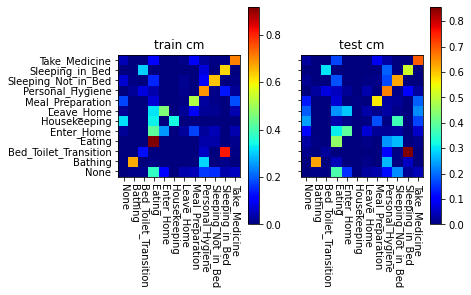

In [10]:
from metric.CMbasedMetric import CMbasedMetric
from metric.event_confusion_matrix import event_confusion_matrix

train_event_cm     = event_confusion_matrix(Strain.a_events,train_pred_events,datasetdscr.activities)
test_event_cm      = event_confusion_matrix(Stest.a_events,test_pred_events,datasetdscr.activities)
fig,axs=plt.subplots(1,2,sharex=True,sharey=True)
vs.plot_CM_normal(train_event_cm,datasetdscr.activities,title='train cm',ax=axs[0])
print('train',CMbasedMetric(train_event_cm));
print('train macro avg',CMbasedMetric(train_event_cm,'macro'));


vs.plot_CM_normal(test_event_cm,datasetdscr.activities,title='test cm',ax=axs[1])
print('test',CMbasedMetric(test_event_cm));
print('test macro avg',CMbasedMetric(test_event_cm,'macro'));




{'method': {0: {'test': <general.utils.Data object at 0x7fc02252abb0>}}}


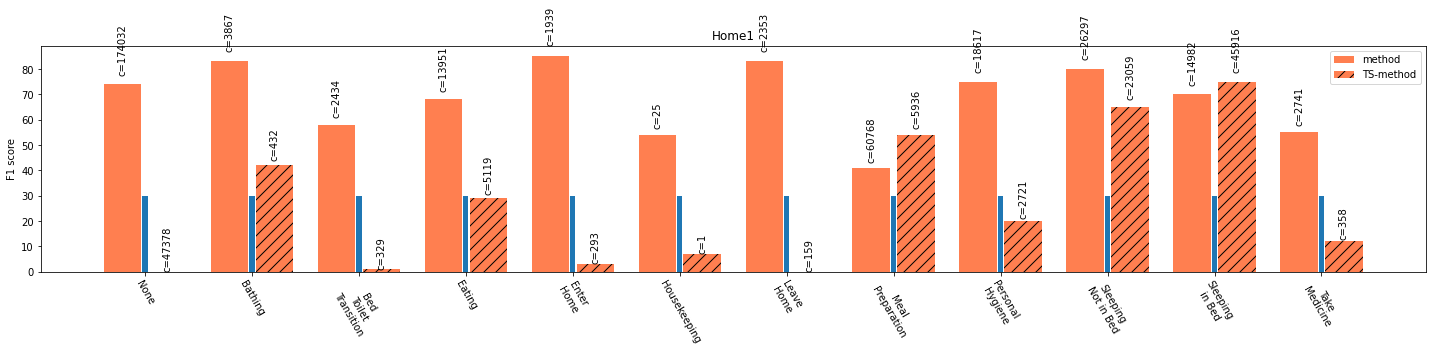

{'method': {0: {'test': <general.utils.Data object at 0x7fc01cb26eb0>}}}


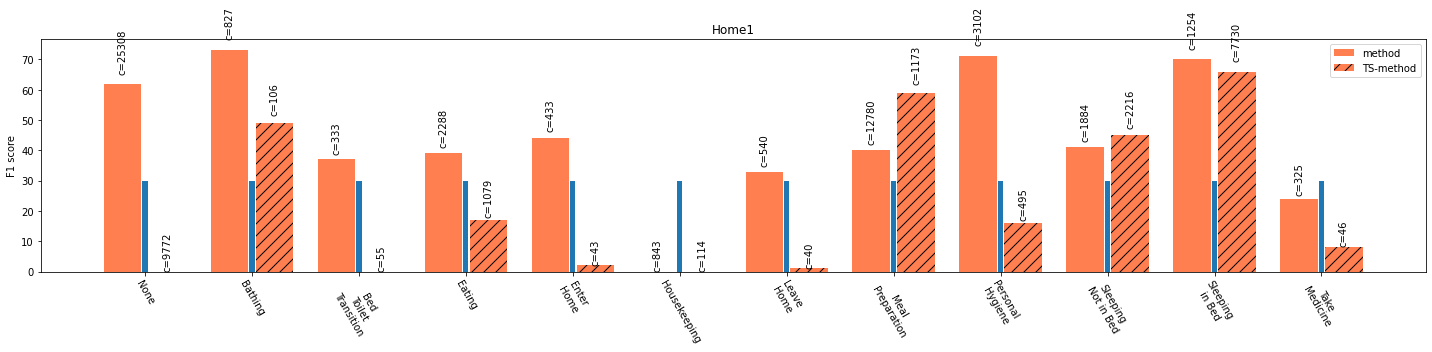

In [11]:
import result_analyse.visualisation as vs
import importlib
importlib.reload(result_analyse.visualisation)

vs.plot_per_act_cm(datasetdscr,train_cm,train_event_cm)
# import matplotlib.pyplot as plt
# plt.show()
vs.plot_per_act_cm(datasetdscr,test_cm,test_event_cm)